# *Data Set Creation for the stage 1*  [**STREAMS** ]

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Number of synthetic students
n_students = 20000

# Streams (target classes)
streams = ["Arts", "Science", "Commerce", "Vocational"]

# Demographics
ages = np.random.randint(15, 19, size=n_students)   # Class 10–12 students
genders = np.random.choice(["Male", "Female"], size=n_students)
locations = np.random.choice(["Urban", "Rural", "Semi-Urban"], size=n_students)

# Quiz responses: 25 questions (Likert scale 1–5)
quiz_data = np.random.randint(1, 6, size=(n_students, 24))

# Convert to DataFrame
quiz_cols = [f"Q{i}" for i in range(1, 25)]
quiz_df = pd.DataFrame(quiz_data, columns=quiz_cols)

# Aggregate psychometric scores (mean of relevant Qs)
psychometrics = pd.DataFrame({
    "analytical_reasoning_score": quiz_df[["Q1", "Q2", "Q3"]].mean(axis=1),
    "numerical_aptitude_score": quiz_df[["Q4", "Q5", "Q6"]].mean(axis=1),
    "communication_score": quiz_df[["Q7", "Q8", "Q9"]].mean(axis=1),
    "creativity_score": quiz_df[["Q10", "Q11", "Q12"]].mean(axis=1),
    "scientific_interest_score": quiz_df[["Q13", "Q14", "Q15"]].mean(axis=1),
    "business_interest_score": quiz_df[["Q16", "Q17", "Q18"]].mean(axis=1),
    "practical_skills_score": quiz_df[["Q19", "Q20", "Q21"]].mean(axis=1),
    "leadership_score": quiz_df[["Q22", "Q23", "Q24"]].mean(axis=1),
})

# Academic background (simulate percentages)
academic = pd.DataFrame({
    "maths_marks_percent": np.random.randint(30, 100, size=n_students),
    "science_marks_percent": np.random.randint(30, 100, size=n_students),
    "english_marks_percent": np.random.randint(30, 100, size=n_students),
    "social_science_marks_percent": np.random.randint(30, 100, size=n_students),
    "commerce_marks_percent": np.random.randint(30, 100, size=n_students),
})

# Target (recommended stream) – synthetic mapping
def assign_stream(row):
    if row["scientific_interest_score"] > 3.5 and row["maths_marks_percent"] > 70:
        return "Science"
    elif row["creativity_score"] > 3.5 and row["social_science_marks_percent"] > 60:
        return "Arts"
    elif row["business_interest_score"] > 3.5 and row["commerce_marks_percent"] > 65:
        return "Commerce"
    else:
        return "Vocational"

target = psychometrics.join(academic).apply(assign_stream, axis=1)

# Combine all data
df = pd.DataFrame({
    "student_id": range(1, n_students+1),
    "age": ages,
    "gender": genders,
    "location": locations,
    "recommended_stream": target
})

final_df = pd.concat([df, quiz_df, psychometrics, academic], axis=1)

# Save to CSV
final_df.to_csv("stage1_student_dataset.csv", index=False)

print(final_df.head())


   student_id  age  gender    location recommended_stream  Q1  Q2  Q3  Q4  Q5  \
0           1   17    Male       Rural         Vocational   1   1   3   1   4   
1           2   18  Female       Rural         Vocational   4   5   5   3   2   
2           3   15  Female       Urban         Vocational   2   3   4   2   5   
3           4   17  Female       Urban         Vocational   1   4   2   5   3   
4           5   17    Male  Semi-Urban           Commerce   5   5   3   4   2   

   ...  creativity_score  scientific_interest_score  business_interest_score  \
0  ...          3.666667                   3.000000                 2.000000   
1  ...          4.000000                   3.666667                 3.333333   
2  ...          3.000000                   1.666667                 2.000000   
3  ...          3.333333                   2.666667                 3.000000   
4  ...          3.333333                   2.333333                 3.666667   

   practical_skills_score  leade

# *Data Set Creation for the stage 2*  [**Subjects & Careers** ]

In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Load Stage 1 dataset
# -----------------------------
stage1_df = pd.read_csv("stage1_student_dataset.csv")

# -----------------------------
# 2. Define subjects/careers per stream
# -----------------------------
stream_subjects = {
    "Science": ["Physics", "Chemistry", "Biology", "Mathematics", "Computer Science"],
    "Arts": ["Literature", "History", "Political Science", "Sociology", "Fine Arts"],
    "Commerce": ["Accounting", "Economics", "Finance", "Business Studies", "Marketing"],
    "Vocational": ["ITI - Electrician/Mechanic", "Hospitality", "Fashion Design", "Technical Diploma", "Skilled Trades"]
}

stream_careers = {
    "Science": ["Engineering/Data Science", "Chemistry/Pharma", "Medicine/Biotech", "Computer Science/IT", "Physicist/Researcher"],
    "Arts": ["Literature/Journalism", "Historian/Teacher", "UPSC/Law/Political Science", "NGO/Social Work", "Fine Arts/Design"],
    "Commerce": ["Chartered Accountant/Finance", "Economist/Banking", "MBA/Entrepreneur", "Business Manager", "Marketing/Sales"],
    "Vocational": ["ITI Electrician/Mechanic", "Chef/Hotel Management", "Designer/Fashion", "Technical Diploma", "Skilled Trades"]
}

# -----------------------------
# 3. Explicit mapping of quiz keys to subject/career
# -----------------------------
quiz_to_subject_career = {
    "Science": {
        "math_interest": ("Mathematics", "Engineering/Data Science"),
        "chemistry_interest": ("Chemistry", "Chemistry/Pharma"),
        "biology_interest": ("Biology", "Medicine/Biotech"),
        "cs_interest": ("Computer Science", "Computer Science/IT"),
        "physics_interest": ("Physics", "Physicist/Researcher")
    },
    "Arts": {
        "writing_interest": ("Literature", "Literature/Journalism"),
        "history_interest": ("History", "Historian/Teacher"),
        "politics_interest": ("Political Science", "UPSC/Law/Political Science"),
        "sociology_interest": ("Sociology", "NGO/Social Work"),
        "arts_interest": ("Fine Arts", "Fine Arts/Design")
    },
    "Commerce": {
        "accounting_interest": ("Accounting", "Chartered Accountant/Finance"),
        "economics_interest": ("Economics", "Economist/Banking"),
        "finance_interest": ("Finance", "MBA/Entrepreneur"),
        "business_interest": ("Business Studies", "Business Manager"),
        "marketing_interest": ("Marketing", "Marketing/Sales")
    },
    "Vocational": {
        "technical_skills_interest": ("ITI - Electrician/Mechanic", "ITI Electrician/Mechanic"),
        "hospitality_interest": ("Hospitality", "Chef/Hotel Management"),
        "design_interest": ("Fashion Design", "Designer/Fashion"),
        "practical_learning_interest": ("Technical Diploma", "Technical Diploma"),
        "tools_interest": ("Skilled Trades", "Skilled Trades")
    }
}

# -----------------------------
# 4. Generate stream-specific quiz
# -----------------------------
def generate_stream_quiz(stream):
    if stream == "Science":
        return {k: np.random.randint(1,6) for k in quiz_to_subject_career["Science"].keys()}
    elif stream == "Arts":
        return {k: np.random.randint(1,6) for k in quiz_to_subject_career["Arts"].keys()}
    elif stream == "Commerce":
        return {k: np.random.randint(1,6) for k in quiz_to_subject_career["Commerce"].keys()}
    else:  # Vocational
        return {k: np.random.randint(1,6) for k in quiz_to_subject_career["Vocational"].keys()}

# -----------------------------
# 5. Assign subject/career based on highest quiz score
# -----------------------------
def assign_subject_career(stream, quiz_scores):
    max_key = max(quiz_scores, key=quiz_scores.get)
    return quiz_to_subject_career[stream][max_key]

# -----------------------------
# 6. Generate Stage 2 dataset
# -----------------------------
stage2_records = []

for i, row in stage1_df.iterrows():
    student_id = row["student_id"]
    stream = row["recommended_stream"]

    # Generate quiz
    quiz = generate_stream_quiz(stream)

    # Assign subject & career based on highest interest
    subject, career = assign_subject_career(stream, quiz)

    # Compile record
    record = {
        "student_id": student_id,
        "recommended_stream": stream,
        "recommended_subject": subject,
        "recommended_career": career
    }
    record.update(quiz)
    stage2_records.append(record)

# Convert to DataFrame
stage2_df = pd.DataFrame(stage2_records)

# Save Stage 2 dataset
stage2_df.to_csv("stage2_student_dataset.csv", index=False)

# Preview
print(stage2_df.head())


   student_id recommended_stream recommended_subject  \
0           1         Vocational         Hospitality   
1           2         Vocational      Fashion Design   
2           3         Vocational   Technical Diploma   
3           4         Vocational      Fashion Design   
4           5           Commerce          Accounting   

             recommended_career  technical_skills_interest  \
0         Chef/Hotel Management                        2.0   
1              Designer/Fashion                        2.0   
2             Technical Diploma                        1.0   
3              Designer/Fashion                        4.0   
4  Chartered Accountant/Finance                        NaN   

   hospitality_interest  design_interest  practical_learning_interest  \
0                   5.0              4.0                          4.0   
1                   1.0              5.0                          5.0   
2                   2.0              1.0                          5.0  

# *Data Set Creation for the stage 3*  [**Colleges** ]

In [ ]:
import pandas as pd
import numpy as np
import random

# Load Stage 2 dataset
stage2_df = pd.read_csv("stage2_student_dataset.csv")

# Detailed college database
college_db = [
    # 1-5 (from previous example)
    {"college_id": 1, "college_name": "Govt. Gandhi Memorial Science College, Srinagar", "stream": "Science", "subjects": ["Physics","Chemistry","Biology","Mathematics","Computer Science"], "distance_km":5, "travel_time_min":15, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Srinagar", "tuition_fees":22000, "rating":4.5, "faculty_count":45, "placement_opportunities":"High", "average_package":6.5, "facilities":["Labs","Library","WiFi","Sports"], "extra_curricular":["Music Club","Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC A", "entry_criteria":"Merit-based"},
    {"college_id": 2, "college_name": "Govt. Degree College, Anantnag", "stream": "Arts", "subjects": ["Literature","History","Political Science","Sociology","Fine Arts"], "distance_km":8, "travel_time_min":25, "hostel":True, "accommodation_type":"Shared", "scholarship":False, "scholarship_eligibility":"N/A", "city":"Anantnag", "tuition_fees":15000, "rating":4.2, "faculty_count":35, "placement_opportunities":"Medium", "average_package":3.5, "facilities":["Library","Auditorium","WiFi"], "extra_curricular":["Drama Club","Literature Society"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 3, "college_name": "Govt. MAM College, Jammu", "stream": "Commerce", "subjects": ["Accounting","Economics","Finance","Business Studies","Marketing"], "distance_km":10, "travel_time_min":30, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Jammu", "tuition_fees":22000, "rating":4.3, "faculty_count":40, "placement_opportunities":"High", "average_package":5.5, "facilities":["Library","WiFi","Computer Lab"], "extra_curricular":["Debate Club","Entrepreneurship Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC A", "entry_criteria":"Merit-based"},
    {"college_id": 4, "college_name": "Govt. Degree College, Baramulla", "stream": "Science", "subjects": ["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":12, "travel_time_min":40, "hostel":True, "accommodation_type":"Single", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Baramulla", "tuition_fees":20000, "rating":4.1, "faculty_count":38, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Labs","Library","Sports"], "extra_curricular":["Science Club","Sports Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 5, "college_name": "Govt. Degree College, Sopore", "stream": "Arts", "subjects": ["Psychology","Philosophy","History","Literature"], "distance_km":15, "travel_time_min":50, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Sopore", "tuition_fees":16000, "rating":4.0, "faculty_count":30, "placement_opportunities":"Low", "average_package":3.0, "facilities":["Library","WiFi"], "extra_curricular":["Drama Club","Music Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},

    # 6-10
    {"college_id": 6, "college_name": "Govt. Polytechnic College, Srinagar", "stream": "Vocational", "subjects": ["Electrician","Hospitality","Fashion Design","Technical Diploma","Skilled Trades"], "distance_km":7, "travel_time_min":20, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Srinagar", "tuition_fees":18000, "rating":4.2, "faculty_count":28, "placement_opportunities":"Medium", "average_package":4.0, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Technical Club","Sports Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 7, "college_name": "Govt. Degree College, Udhampur", "stream": "Commerce", "subjects": ["Economics","Finance","Business Administration"], "distance_km":20, "travel_time_min":60, "hostel":False, "accommodation_type":"PG/Private", "scholarship":False, "scholarship_eligibility":"N/A", "city":"Udhampur", "tuition_fees":23000, "rating":4.1, "faculty_count":32, "placement_opportunities":"Medium", "average_package":4.8, "facilities":["Library","WiFi"], "extra_curricular":["Entrepreneurship Club","Debate Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 8, "college_name": "Govt. Degree College for Women, Srinagar", "stream": "Arts", "subjects": ["Fine Arts","Music","Drama","Sociology"], "distance_km":6, "travel_time_min":20, "hostel":True, "accommodation_type":"Single", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Srinagar", "tuition_fees":15000, "rating":4.3, "faculty_count":28, "placement_opportunities":"Medium", "average_package":3.8, "facilities":["Library","Auditorium","WiFi"], "extra_curricular":["Music Club","Drama Club"], "transport_available":True, "gender_specific":"Girls", "accreditation":"NAAC A", "entry_criteria":"Merit-based"},
    {"college_id": 9, "college_name": "Govt. Science College, Jammu", "stream": "Science", "subjects": ["Computer Science","Mathematics","Electronics"], "distance_km":9, "travel_time_min":25, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Jammu", "tuition_fees":25000, "rating":4.7, "faculty_count":40, "placement_opportunities":"High", "average_package":7.0, "facilities":["Labs","Library","WiFi","Sports"], "extra_curricular":["Coding Club","Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC A", "entry_criteria":"Merit-based"},
    {"college_id": 10, "college_name": "Govt. Degree College, Pulwama", "stream": "Vocational", "subjects": ["Automobile","IT","Textile Designing"], "distance_km":18, "travel_time_min":55, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Pulwama", "tuition_fees":19000, "rating":4.2, "faculty_count":30, "placement_opportunities":"Medium", "average_package":4.0, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Technical Club","Art Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},

    # 11-20
    {"college_id": 11, "college_name": "Govt. Degree College, Rajouri", "stream": "Arts", "subjects": ["History","Political Science","Literature"], "distance_km":25, "travel_time_min":75, "hostel":False, "accommodation_type":"PG/Private", "scholarship":False, "scholarship_eligibility":"N/A", "city":"Rajouri", "tuition_fees":16000, "rating":4.0, "faculty_count":28, "placement_opportunities":"Low", "average_package":3.0, "facilities":["Library","WiFi"], "extra_curricular":["Debate Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 12, "college_name": "Govt. Degree College, Kathua", "stream": "Science", "subjects": ["Physics","Chemistry","Mathematics"], "distance_km":18, "travel_time_min":50, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Kathua", "tuition_fees":21000, "rating":4.3, "faculty_count":35, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 13, "college_name": "Govt. Degree College, Kulgam", "stream": "Commerce", "subjects": ["Accounting","Finance","Business Studies"], "distance_km":20, "travel_time_min":60, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Kulgam", "tuition_fees":22000, "rating":4.2, "faculty_count":30, "placement_opportunities":"Medium", "average_package":4.8, "facilities":["Library","WiFi"], "extra_curricular":["Debate Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 14, "college_name": "Govt. Degree College, Anantnag", "stream": "Vocational", "subjects": ["Hospitality","ITI Electrician","Technical Diploma"], "distance_km":10, "travel_time_min":30, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Anantnag", "tuition_fees":18000, "rating":4.1, "faculty_count":28, "placement_opportunities":"Medium", "average_package":4.2, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Technical Club","Music Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 15, "college_name": "Govt. Degree College, Shopian", "stream": "Arts", "subjects": ["Psychology","Sociology","Literature"], "distance_km":12, "travel_time_min":40, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Shopian", "tuition_fees":15000, "rating":4.0, "faculty_count":25, "placement_opportunities":"Low", "average_package":3.2, "facilities":["Library","WiFi"], "extra_curricular":["Drama Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 16, "college_name": "Govt. Degree College, Leh", "stream": "Science", "subjects": ["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":5, "travel_time_min":15, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Leh", "tuition_fees":23000, "rating":4.5, "faculty_count":32, "placement_opportunities":"Medium", "average_package":5.0, "facilities":["Labs","Library","WiFi","Sports"], "extra_curricular":["Science Club","Sports Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC A", "entry_criteria":"Merit-based"},
    {"college_id": 17, "college_name": "Govt. Degree College, Kargil", "stream": "Commerce", "subjects": ["Accounting","Economics","Finance"], "distance_km":8, "travel_time_min":25, "hostel":True, "accommodation_type":"Single", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Kargil", "tuition_fees":22000, "rating":4.3, "faculty_count":28, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Library","WiFi"], "extra_curricular":["Debate Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 18, "college_name": "Govt. Degree College, Budgam", "stream": "Arts", "subjects": ["History","Literature","Political Science"], "distance_km":10, "travel_time_min":35, "hostel":False, "accommodation_type":"PG/Private", "scholarship":False, "scholarship_eligibility":"N/A", "city":"Budgam", "tuition_fees":15000, "rating":4.0, "faculty_count":28, "placement_opportunities":"Low", "average_package":3.0, "facilities":["Library","WiFi"], "extra_curricular":["Music Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 19, "college_name": "Govt. Degree College, Bandipora", "stream": "Vocational", "subjects": ["Textile Designing","ITI Electrician","Hospitality"], "distance_km":15, "travel_time_min":50, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Bandipora", "tuition_fees":18000, "rating":4.1, "faculty_count":30, "placement_opportunities":"Medium", "average_package":4.0, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Technical Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 20, "college_name": "Govt. Degree College, Doda", "stream": "Science", "subjects": ["Physics","Chemistry","Biology","Mathematics"], "distance_km":18, "travel_time_min":60, "hostel":True, "accommodation_type":"Single", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Doda", "tuition_fees":22000, "rating":4.2, "faculty_count":35, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"}
]
# 21-30
college_db += [
    {"college_id": 21, "college_name": "Govt. Degree College, Ganderbal", "stream": "Science", "subjects": ["Physics","Chemistry","Biology","Mathematics"], "distance_km":7, "travel_time_min":20, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Ganderbal", "tuition_fees":21000, "rating":4.3, "faculty_count":32, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 22, "college_name": "Govt. Degree College, Kupwara", "stream": "Arts", "subjects": ["History","Literature","Political Science"], "distance_km":12, "travel_time_min":40, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Kupwara", "tuition_fees":15000, "rating":4.0, "faculty_count":28, "placement_opportunities":"Low", "average_package":3.0, "facilities":["Library","WiFi"], "extra_curricular":["Drama Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 23, "college_name": "Govt. Degree College, Reasi", "stream": "Commerce", "subjects": ["Accounting","Finance","Business Studies"], "distance_km":18, "travel_time_min":55, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Reasi", "tuition_fees":22000, "rating":4.2, "faculty_count":30, "placement_opportunities":"Medium", "average_package":4.8, "facilities":["Library","WiFi"], "extra_curricular":["Debate Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 24, "college_name": "Govt. Degree College, Poonch", "stream": "Arts", "subjects": ["Psychology","Sociology","Literature"], "distance_km":22, "travel_time_min":70, "hostel":False, "accommodation_type":"PG/Private", "scholarship":False, "scholarship_eligibility":"N/A", "city":"Poonch", "tuition_fees":15000, "rating":4.0, "faculty_count":25, "placement_opportunities":"Low", "average_package":3.2, "facilities":["Library","WiFi"], "extra_curricular":["Music Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 25, "college_name": "Govt. Degree College, Ramban", "stream": "Science", "subjects": ["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":16, "travel_time_min":50, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Ramban", "tuition_fees":22000, "rating":4.2, "faculty_count":32, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 26, "college_name": "Govt. Degree College, Kishtwar", "stream": "Vocational", "subjects": ["ITI Electrician","Automobile","Hospitality"], "distance_km":20, "travel_time_min":60, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Kishtwar", "tuition_fees":18000, "rating":4.1, "faculty_count":28, "placement_opportunities":"Medium", "average_package":4.0, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Technical Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 27, "college_name": "Govt. Degree College, Kathua Science", "stream": "Science", "subjects": ["Physics","Chemistry","Mathematics","Biology"], "distance_km":15, "travel_time_min":45, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Kathua", "tuition_fees":21000, "rating":4.3, "faculty_count":32, "placement_opportunities":"Medium", "average_package":4.5, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Science Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 28, "college_name": "Govt. Degree College, Udhampur Arts", "stream": "Arts", "subjects": ["History","Literature","Political Science"], "distance_km":10, "travel_time_min":35, "hostel":False, "accommodation_type":"PG/Private", "scholarship":False, "scholarship_eligibility":"N/A", "city":"Udhampur", "tuition_fees":15000, "rating":4.0, "faculty_count":28, "placement_opportunities":"Low", "average_package":3.0, "facilities":["Library","WiFi"], "extra_curricular":["Drama Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 29, "college_name": "Govt. Degree College, Leh Vocational", "stream": "Vocational", "subjects": ["Technical Diploma","Hospitality","IT"], "distance_km":5, "travel_time_min":15, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Leh", "tuition_fees":19000, "rating":4.2, "faculty_count":30, "placement_opportunities":"Medium", "average_package":4.0, "facilities":["Labs","Library","WiFi"], "extra_curricular":["Technical Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 30, "college_name": "Govt. Degree College, Kargil Arts", "stream": "Arts", "subjects": ["Psychology","Sociology","Literature"], "distance_km":8, "travel_time_min":25, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Kargil", "tuition_fees":15000, "rating":4.0, "faculty_count":25, "placement_opportunities":"Low", "average_package":3.0, "facilities":["Library","WiFi"], "extra_curricular":["Music Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"}
]

# 31-50
college_db += [
    {"college_id": 31, "college_name": "Govt. Degree College, Srinagar Arts 2", "stream": "Arts", "subjects":["Literature","History","Sociology"], "distance_km":5, "travel_time_min":15, "hostel":True,"accommodation_type":"Single", "scholarship":True,"scholarship_eligibility":"Merit-based", "city":"Srinagar", "tuition_fees":15000,"rating":4.1,"faculty_count":30,"placement_opportunities":"Medium","average_package":3.5,"facilities":["Library","WiFi"],"extra_curricular":["Drama Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 32, "college_name": "Govt. Degree College, Baramulla Arts", "stream": "Arts", "subjects":["History","Literature","Political Science"], "distance_km":12,"travel_time_min":40,"hostel":False,"accommodation_type":"PG/Private","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Baramulla","tuition_fees":15000,"rating":4.0,"faculty_count":28,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Music Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 33, "college_name": "Govt. Degree College, Pulwama Arts", "stream": "Arts", "subjects":["Psychology","Sociology","Literature"], "distance_km":10,"travel_time_min":35,"hostel":False,"accommodation_type":"PG/Private","scholarship":False,"scholarship_eligibility":"N/A","city":"Pulwama","tuition_fees":15000,"rating":4.0,"faculty_count":25,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Drama Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 34, "college_name": "Govt. Degree College, Anantnag Commerce 2", "stream": "Commerce", "subjects":["Accounting","Finance","Business Studies"], "distance_km":15,"travel_time_min":45,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Anantnag","tuition_fees":22000,"rating":4.2,"faculty_count":30,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Library","WiFi"],"extra_curricular":["Debate Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 35, "college_name": "Govt. Degree College, Jammu Vocational 2", "stream": "Vocational", "subjects":["ITI Electrician","Automobile","Hospitality"], "distance_km":8,"travel_time_min":25,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Jammu","tuition_fees":19000,"rating":4.1,"faculty_count":28,"placement_opportunities":"Medium","average_package":4.0,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Technical Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 36, "college_name": "Govt. Degree College, Kulgam Arts 2", "stream": "Arts", "subjects":["History","Literature","Political Science"], "distance_km":12,"travel_time_min":40,"hostel":False,"accommodation_type":"PG/Private","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Kulgam","tuition_fees":15000,"rating":4.0,"faculty_count":28,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Music Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 37, "college_name": "Govt. Degree College, Budgam Science 2", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Biology"], "distance_km":8,"travel_time_min":25,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit & SC/ST","city":"Budgam","tuition_fees":22000,"rating":4.2,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 38, "college_name": "Govt. Degree College, Baramulla Vocational", "stream": "Vocational", "subjects":["Textile Designing","ITI Electrician","Hospitality"], "distance_km":15,"travel_time_min":50,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Baramulla","tuition_fees":18000,"rating":4.1,"faculty_count":30,"placement_opportunities":"Medium","average_package":4.0,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Technical Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 39, "college_name": "Govt. Degree College, Jammu Science 2", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":7,"travel_time_min":20,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit & SC/ST","city":"Jammu","tuition_fees":22000,"rating":4.3,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 40, "college_name": "Govt. Degree College, Anantnag Vocational", "stream": "Vocational", "subjects":["Technical Diploma","Hospitality","IT"], "distance_km":10,"travel_time_min":30,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Anantnag","tuition_fees":19000,"rating":4.2,"faculty_count":30,"placement_opportunities":"Medium","average_package":4.0,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Technical Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},

    # 41-50
    {"college_id": 41, "college_name": "Govt. Degree College, Leh Arts", "stream": "Arts", "subjects":["Psychology","Sociology","Literature"], "distance_km":5,"travel_time_min":15,"hostel":False,"accommodation_type":"PG/Private","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Leh","tuition_fees":15000,"rating":4.0,"faculty_count":25,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Drama Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 42, "college_name": "Govt. Degree College, Kargil Science 2", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":8,"travel_time_min":25,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit & SC/ST","city":"Kargil","tuition_fees":22000,"rating":4.2,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 43, "college_name": "Govt. Degree College, Ganderbal Arts 2", "stream": "Arts", "subjects":["History","Literature","Political Science"], "distance_km":7,"travel_time_min":20,"hostel":False,"accommodation_type":"PG/Private","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Ganderbal","tuition_fees":15000,"rating":4.0,"faculty_count":28,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Music Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 44, "college_name": "Govt. Degree College, Kupwara Science 2", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Biology"], "distance_km":12,"travel_time_min":40,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Kupwara","tuition_fees":22000,"rating":4.3,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 45, "college_name": "Govt. Degree College, Reasi Arts", "stream": "Arts", "subjects":["Psychology","Sociology","Literature"], "distance_km":18,"travel_time_min":55,"hostel":False,"accommodation_type":"PG/Private","scholarship":False,"scholarship_eligibility":"N/A","city":"Reasi","tuition_fees":15000,"rating":4.0,"faculty_count":25,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Drama Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 46, "college_name": "Govt. Degree College, Poonch Science", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":22,"travel_time_min":70,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit & SC/ST","city":"Poonch","tuition_fees":22000,"rating":4.3,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 47, "college_name": "Govt. Degree College, Ramban Arts", "stream": "Arts", "subjects":["History","Literature","Political Science"], "distance_km":16,"travel_time_min":50,"hostel":False,"accommodation_type":"PG/Private","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Ramban","tuition_fees":15000,"rating":4.0,"faculty_count":28,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Music Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 48, "college_name": "Govt. Degree College, Kishtwar Science", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Biology"], "distance_km":20,"travel_time_min":60,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit & SC/ST","city":"Kishtwar","tuition_fees":22000,"rating":4.3,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 49, "college_name": "Govt. Degree College, Doda Arts", "stream": "Arts", "subjects":["Psychology","Sociology","Literature"], "distance_km":18,"travel_time_min":60,"hostel":False,"accommodation_type":"PG/Private","scholarship":False,"scholarship_eligibility":"N/A","city":"Doda","tuition_fees":15000,"rating":4.0,"faculty_count":25,"placement_opportunities":"Low","average_package":3.0,"facilities":["Library","WiFi"],"extra_curricular":["Drama Club"],"transport_available":False,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"},
    {"college_id": 50, "college_name": "Govt. Degree College, Ramban Science", "stream": "Science", "subjects":["Physics","Chemistry","Mathematics","Computer Science"], "distance_km":16,"travel_time_min":50,"hostel":True,"accommodation_type":"Shared","scholarship":True,"scholarship_eligibility":"Merit-based","city":"Ramban","tuition_fees":22000,"rating":4.3,"faculty_count":32,"placement_opportunities":"Medium","average_package":4.5,"facilities":["Labs","Library","WiFi"],"extra_curricular":["Science Club"],"transport_available":True,"gender_specific":"Co-ed","accreditation":"NAAC B","entry_criteria":"Merit-based"}
]
college_db+=[
    {"college_id": 51, "college_name": "Govt. ITI College, Srinagar", "stream": "Vocational", "subjects":["ITI - Electrician/Mechanic","Technical Diploma","Skilled Trades"], "distance_km":6, "travel_time_min":20, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Srinagar", "tuition_fees":18000, "rating":4.3, "faculty_count":25, "placement_opportunities":"High", "average_package":4.5, "facilities":["Labs","Library","WiFi","Workshop"], "extra_curricular":["Technical Club","Sports Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 52, "college_name": "Govt. ITI College, Jammu", "stream": "Vocational", "subjects":["ITI - Electrician/Mechanic","Skilled Trades","Technical Diploma"], "distance_km":8, "travel_time_min":25, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Jammu", "tuition_fees":19000, "rating":4.2, "faculty_count":28, "placement_opportunities":"Medium", "average_package":4.0, "facilities":["Labs","Library","Workshop"], "extra_curricular":["Technical Club","Coding Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 53, "college_name": "Govt. ITI College, Anantnag", "stream": "Vocational", "subjects":["ITI - Electrician/Mechanic","Technical Diploma","Hospitality"], "distance_km":10, "travel_time_min":30, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Anantnag", "tuition_fees":17500, "rating":4.1, "faculty_count":26, "placement_opportunities":"High", "average_package":4.2, "facilities":["Labs","Library","WiFi","Workshop"], "extra_curricular":["Technical Club","Music Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 54, "college_name": "Govt. ITI College, Baramulla", "stream": "Vocational", "subjects":["ITI - Electrician/Mechanic","Skilled Trades","Technical Diploma"], "distance_km":12, "travel_time_min":40, "hostel":False, "accommodation_type":"PG/Private", "scholarship":True, "scholarship_eligibility":"Merit & SC/ST", "city":"Baramulla", "tuition_fees":18000, "rating":4.0, "faculty_count":24, "placement_opportunities":"Medium", "average_package":3.8, "facilities":["Labs","Library","Workshop"], "extra_curricular":["Technical Club","Art Club"], "transport_available":False, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"},
    {"college_id": 55, "college_name": "Govt. ITI College, Kulgam", "stream": "Vocational", "subjects":["ITI - Electrician/Mechanic","Skilled Trades","Technical Diploma"], "distance_km":9, "travel_time_min":30, "hostel":True, "accommodation_type":"Shared", "scholarship":True, "scholarship_eligibility":"Merit-based", "city":"Kulgam", "tuition_fees":18000, "rating":4.1, "faculty_count":25, "placement_opportunities":"High", "average_package":4.3, "facilities":["Labs","Library","WiFi","Workshop"], "extra_curricular":["Technical Club","Sports Club"], "transport_available":True, "gender_specific":"Co-ed", "accreditation":"NAAC B", "entry_criteria":"Merit-based"}
]



# Function to recommend colleges for a student
def recommend_colleges(row, max_colleges=3):
    stream = row["recommended_stream"]
    subject = row["recommended_subject"]

    # Filter colleges that match stream and offer the subject
    suitable_colleges = [c for c in college_db if c["stream"]==stream and subject in c["subjects"]]

    # Rank colleges by distance (closest first), tie-breaker randomly
    suitable_colleges.sort(key=lambda x: x["distance_km"] + np.random.rand()*0.1)

    # Take top N
    return suitable_colleges[:max_colleges]

# Generate Stage 3 dataset
stage3_records = []

for i, row in stage2_df.iterrows():
    student_id = row["student_id"]
    recommended_colleges = recommend_colleges(row)

    for rank, college in enumerate(recommended_colleges, start=1):
        record = {
            "student_id": student_id,
            "recommended_stream": row["recommended_stream"],
            "recommended_subject": row["recommended_subject"],
            "recommended_career": row["recommended_career"],
            "college_rank": rank,
            "college_id": college["college_id"],
            "college_name": college["college_name"],
            "city": college["city"],
            "distance_km": college["distance_km"],
            "travel_time_min": college["travel_time_min"],
            "hostel_available": college["hostel"],
            "accommodation_type": college["accommodation_type"],
            "scholarship_available": college["scholarship"],
            "scholarship_eligibility": college["scholarship_eligibility"],
            "tuition_fees": college["tuition_fees"],
            "rating": college["rating"],
            "faculty_count": college["faculty_count"],
            "placement_opportunities": college["placement_opportunities"],
            "average_package": college["average_package"],
            "facilities": ",".join(college["facilities"]),
            "extra_curricular": ",".join(college["extra_curricular"]),
            "transport_available": college["transport_available"],
            "gender_specific": college["gender_specific"],
            "accreditation": college["accreditation"],
            "entry_criteria": college["entry_criteria"]
        }
        stage3_records.append(record)

stage3_df = pd.DataFrame(stage3_records)

# Save Stage 3 dataset
stage3_df.to_csv("stage3_college_recommendation_detailed.csv", index=False)

print(stage3_df.head(10))

   student_id recommended_stream recommended_subject  \
0           1         Vocational         Hospitality   
1           1         Vocational         Hospitality   
2           1         Vocational         Hospitality   
3           2         Vocational      Fashion Design   
4           3         Vocational   Technical Diploma   
5           3         Vocational   Technical Diploma   
6           3         Vocational   Technical Diploma   
7           4         Vocational      Fashion Design   
8           5           Commerce          Accounting   
9           5           Commerce          Accounting   

             recommended_career  college_rank  college_id  \
0         Chef/Hotel Management             1          29   
1         Chef/Hotel Management             2           6   
2         Chef/Hotel Management             3          35   
3              Designer/Fashion             1           6   
4             Technical Diploma             1          29   
5             Tec

In [ ]:
import json

# Convert the Python list to JSON and save it to a file
with open("college_db.json", "w", encoding="utf-8") as f:
    json.dump(college_db, f, ensure_ascii=False, indent=4)

print("college_db has been saved as college_db.json")


college_db has been saved as college_db.json


# *EDA for the stage 1*   [**STREAMS** ]

==== Dataset Overview ====
   student_id  age  gender    location recommended_stream  Q1  Q2  Q3  Q4  Q5  \
0           1   17    Male       Rural         Vocational   1   1   3   1   4   
1           2   18  Female       Rural         Vocational   4   5   5   3   2   
2           3   15  Female       Urban         Vocational   2   3   4   2   5   
3           4   17  Female       Urban         Vocational   1   4   2   5   3   
4           5   17    Male  Semi-Urban           Commerce   5   5   3   4   2   

   ...  creativity_score  scientific_interest_score  business_interest_score  \
0  ...          3.666667                   3.000000                 2.000000   
1  ...          4.000000                   3.666667                 3.333333   
2  ...          3.000000                   1.666667                 2.000000   
3  ...          3.333333                   2.666667                 3.000000   
4  ...          3.333333                   2.333333                 3.666667   

   pr

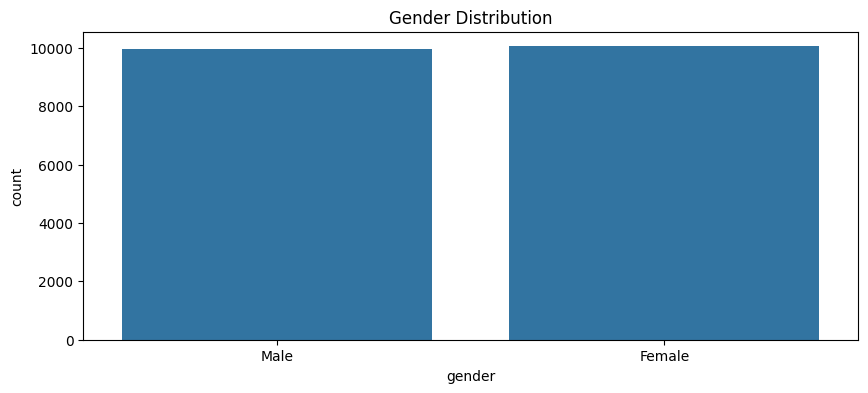

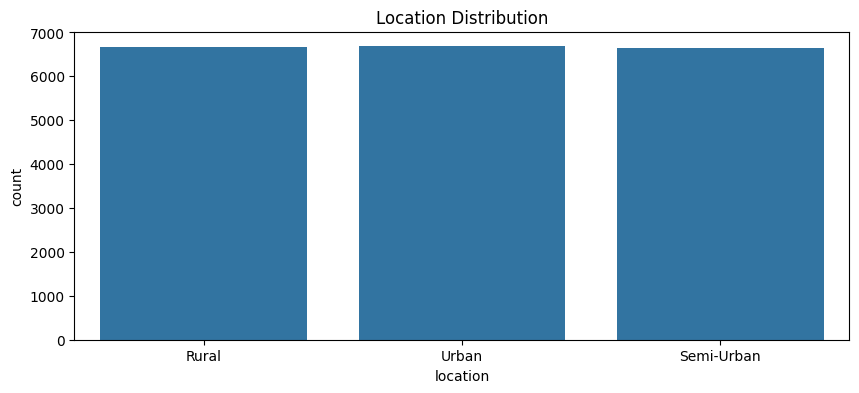

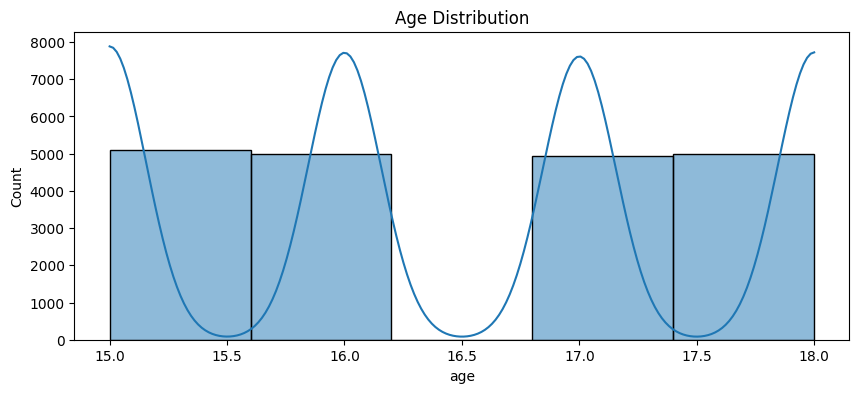

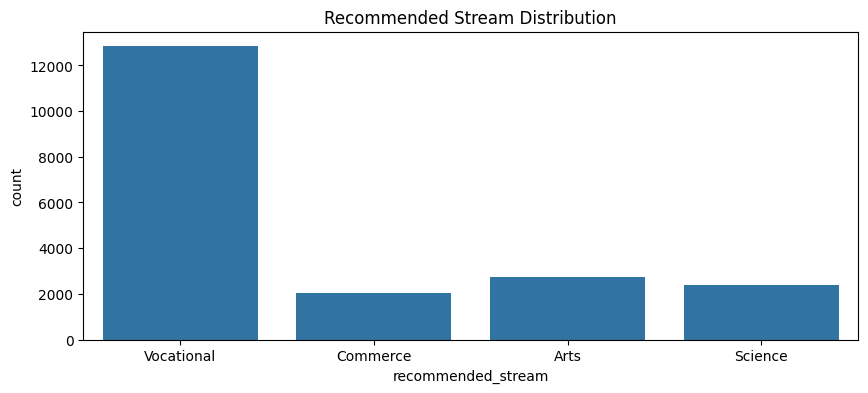

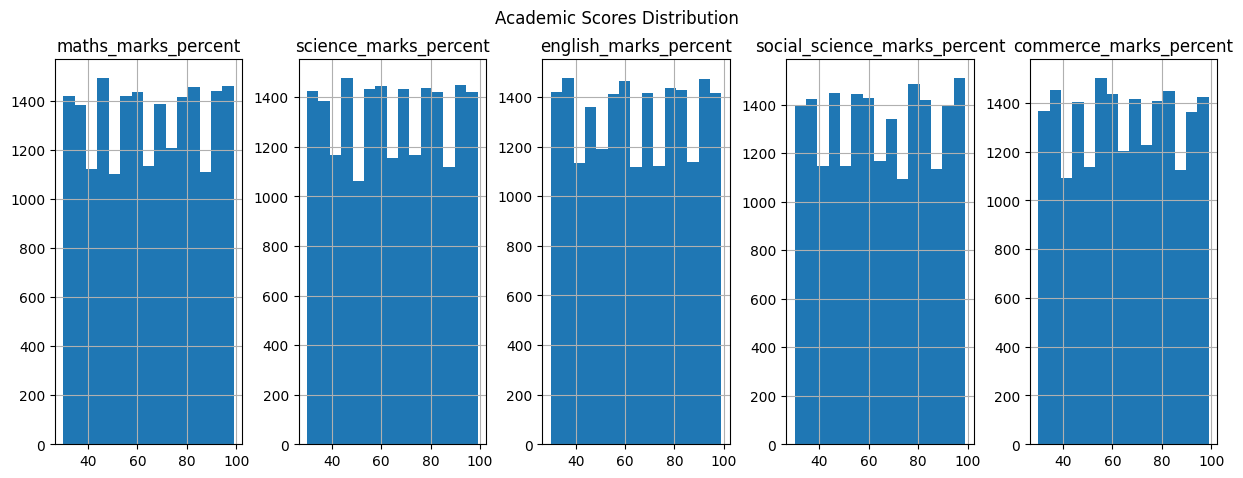

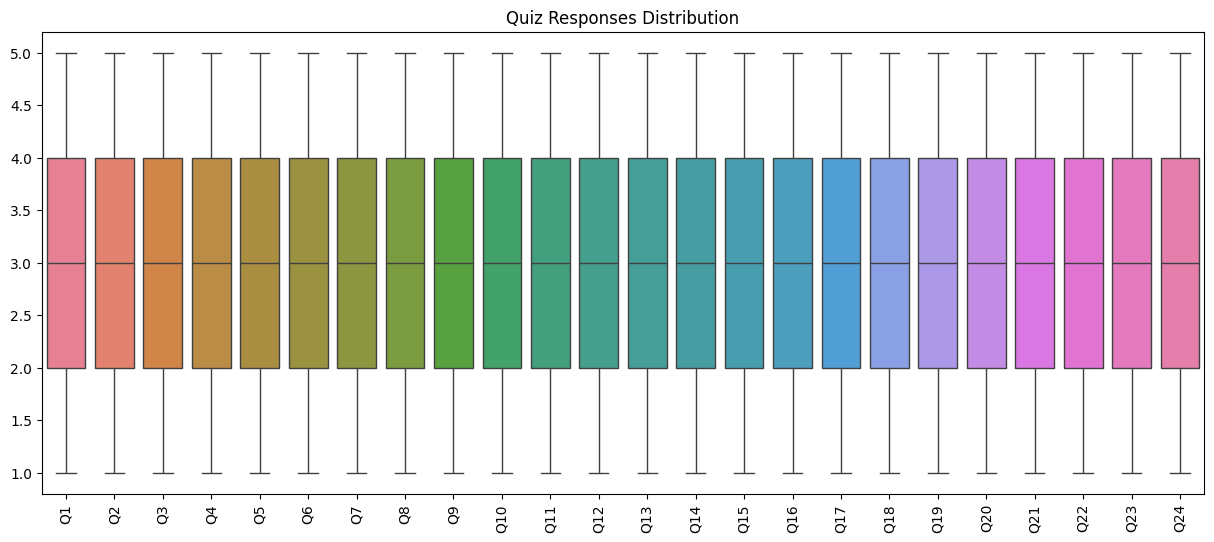

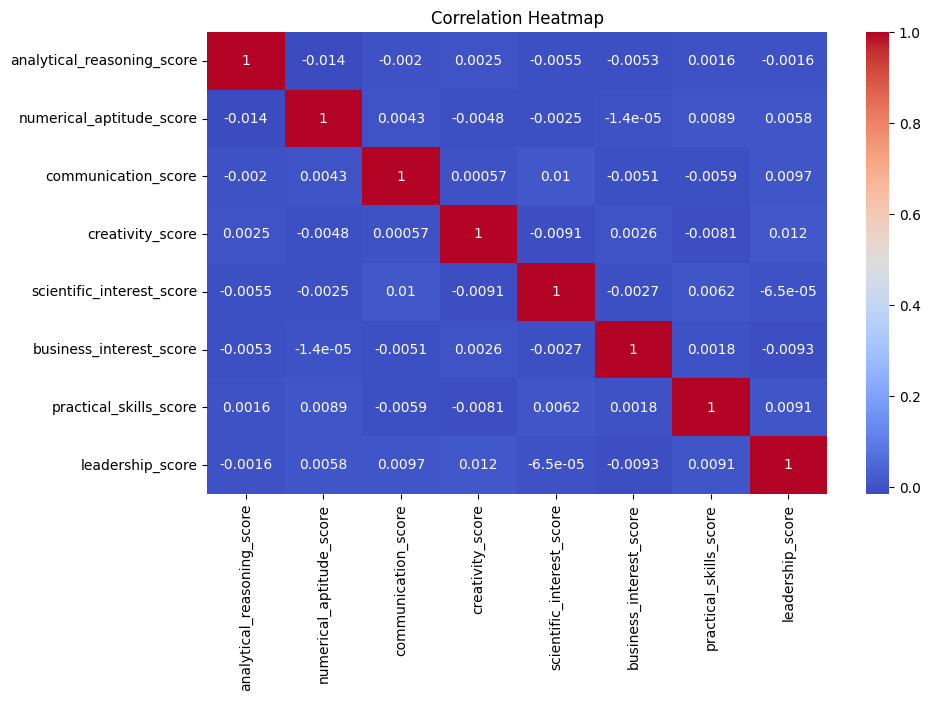

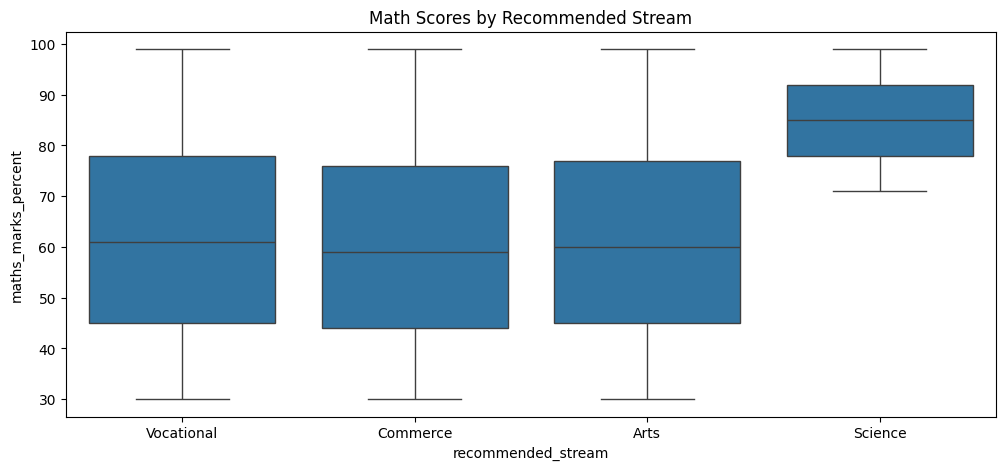

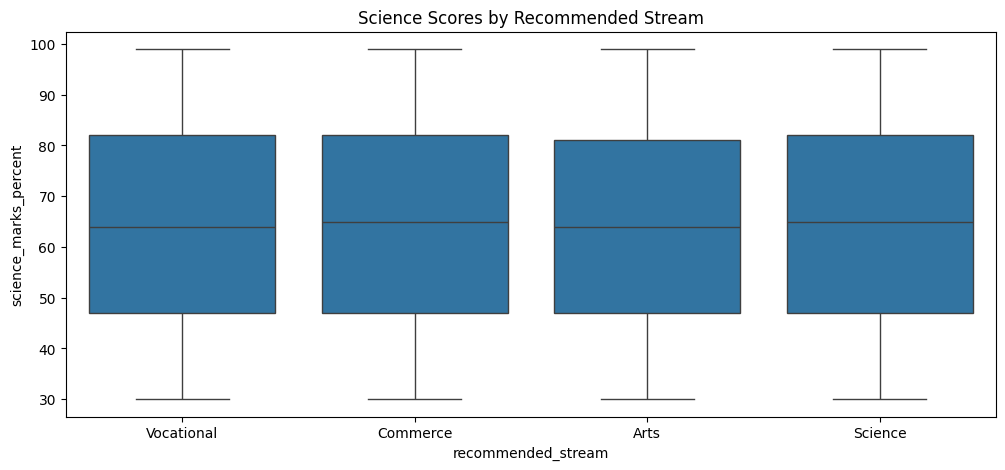

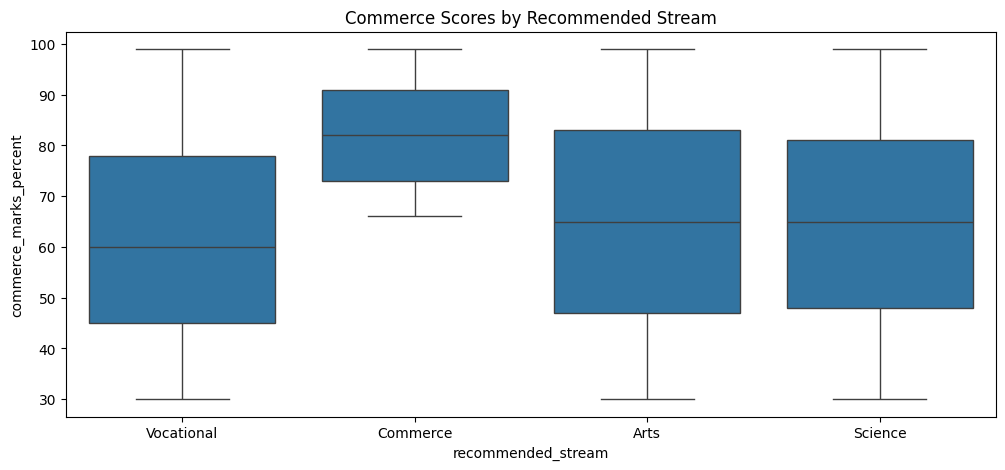


Quiz Question Correlation with Stream:
stream_encoded    1.000000
Q22               0.010938
Q2                0.005798
Q5                0.004489
Q9                0.004252
Q4                0.002713
Q20               0.001925
Q1                0.000345
Q24               0.000040
Q19              -0.001194
Q3               -0.001860
Q8               -0.005224
Q21              -0.006148
Q7               -0.008249
Q6               -0.013413
Q23              -0.014642
Q18              -0.059549
Q16              -0.061389
Q17              -0.063238
Q12              -0.153966
Q10              -0.161179
Q11              -0.168162
Q13              -0.191027
Q14              -0.202656
Q15              -0.204173
Name: stream_encoded, dtype: float64

Features for Model:
['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'maths_marks_percent', 'science_marks_percent', 'english_marks_perc

In [ ]:
# Stage 1 Data Analysis & Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Stage 1 dataset
df = pd.read_csv("stage1_student_dataset.csv")

print("==== Dataset Overview ====")
print(df.head())
print("\nShape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# ===============================
# 1. Demographics Analysis
# ===============================
plt.figure(figsize=(10,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='location', data=df)
plt.title('Location Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.show()

# ===============================
# 2. Target Variable Distribution
# ===============================
plt.figure(figsize=(10,4))
sns.countplot(x='recommended_stream', data=df)
plt.title('Recommended Stream Distribution')
plt.show()

# ===============================
# 3. Academic Scores Analysis
# ===============================
score_cols = ['maths_marks_percent', 'science_marks_percent', 'english_marks_percent',
              'social_science_marks_percent', 'commerce_marks_percent']

df[score_cols].hist(bins=15, figsize=(15,5), layout=(1,5))
plt.suptitle('Academic Scores Distribution')
plt.show()

# ===============================
# 4. Quiz Responses Analysis
# ===============================
quiz_cols = [col for col in df.columns if col.startswith("Q")]

plt.figure(figsize=(15,6))
sns.boxplot(data=df[quiz_cols])
plt.title('Quiz Responses Distribution')
plt.xticks(rotation=90)
plt.show()

# ===============================
# 5. Psychometric Score Correlation
# ===============================
psychometric_cols = ['analytical_reasoning_score', 'numerical_aptitude_score',
                     'communication_score', 'creativity_score', 'scientific_interest_score',
                     'business_interest_score', 'practical_skills_score', 'leadership_score']

plt.figure(figsize=(10,6))
sns.heatmap(df[psychometric_cols].corr(), annot=True, cmap='coolwarm') # Exclude 'recommended_stream' from correlation calculation
plt.title('Correlation Heatmap')
plt.show()

# ===============================
# 6. Relationship Between Academics & Target
# ===============================
plt.figure(figsize=(12,5))
sns.boxplot(x='recommended_stream', y='maths_marks_percent', data=df)
plt.title('Math Scores by Recommended Stream')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='recommended_stream', y='science_marks_percent', data=df)
plt.title('Science Scores by Recommended Stream')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='recommended_stream', y='commerce_marks_percent', data=df)
plt.title('Commerce Scores by Recommended Stream')
plt.show()

# ===============================
# 7. Correlation of Quiz Scores with Stream
# ===============================
# Convert stream to numeric for correlation
df['stream_encoded'] = df['recommended_stream'].map({'Science':0,'Arts':1,'Commerce':2,'Vocational':3})
quiz_corr = df[quiz_cols + ['stream_encoded']].corr()['stream_encoded'].sort_values(ascending=False)
print("\nQuiz Question Correlation with Stream:")
print(quiz_corr)

# ===============================
# 8. Preprocessing for Modeling
# ===============================
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_gender = LabelEncoder()
df['gender_encoded'] = le_gender.fit_transform(df['gender'])

le_location = LabelEncoder()
df['location_encoded'] = le_location.fit_transform(df['location'])

# Feature list for modeling
feature_cols = quiz_cols + score_cols + ['gender_encoded','location_encoded']
X = df[feature_cols]
y = df['recommended_stream']

print("\nFeatures for Model:")
print(feature_cols)
print("\nTarget Variable:")
print(y.value_counts())

# Save preprocessed data for modeling
X.to_csv("X_stage1.csv", index=False)
y.to_csv("y_stage1.csv", index=False)

print("\nEDA & Preprocessing Completed. Data ready for modeling.")

# *Model Training for the stage 1*  [**STREAMS** ]

Classes: ['Arts' 'Commerce' 'Science' 'Vocational']
Train shape: (16000, 31) Test shape: (4000, 31)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:26:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

        Arts       1.00      1.00      1.00       545
    Commerce       1.00      1.00      1.00       411
     Science       1.00      1.00      1.00       478
  Vocational       1.00      1.00      1.00      2566

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Confusion Matrix:
[[ 545    0    0    0]
 [   0  411    0    0]
 [   0    0  478    0]
 [   0    0    0 2566]]


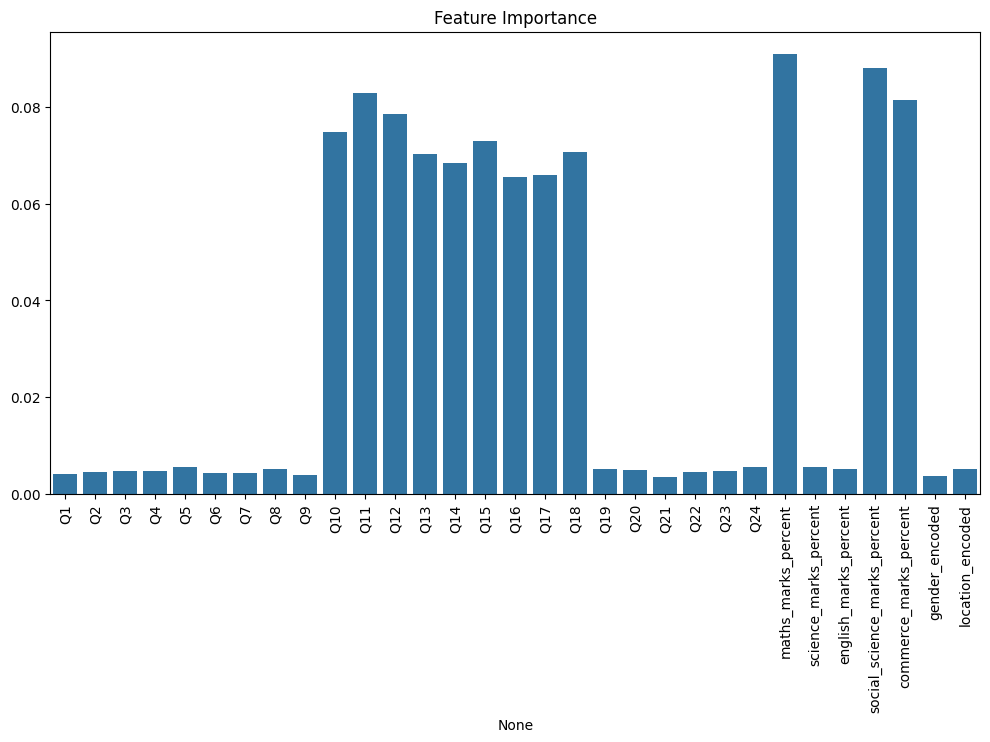


Model and Label Encoder saved for Stage 1 predictions.


In [ ]:
# Stage 1 Model Training: Stream Recommendation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

# -----------------------------
# 1. Load Preprocessed Data
# -----------------------------
X = pd.read_csv("X_stage1.csv")
y = pd.read_csv("y_stage1.csv")['recommended_stream']  # target series

# Encode target variable
le_stream = LabelEncoder()
y_encoded = le_stream.fit_transform(y)  # 0=Arts,1=Commerce,2=Science,3=Vocational
print("Classes:", le_stream.classes_)

# -----------------------------
# 2. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# -----------------------------
# 3. Define XGBoost Model
# -----------------------------
model = XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(le_stream.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=None  # we will handle imbalance using class_weight in scikit-learn wrapper
)

# -----------------------------
# 4. Train Model
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_stream.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optional: Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=X.columns, y=model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

# -----------------------------
# 6. Save Model & Label Encoder
# -----------------------------
joblib.dump(model, "stage1_stream_model.pkl")
joblib.dump(le_stream, "stage1_label_encoder.pkl")

print("\nModel and Label Encoder saved for Stage 1 predictions.")


# *Testing  for the stage 1*  [**STREAMS** ]

In [ ]:
# Stage 1: Test Stream Prediction for New Student

import pandas as pd
import numpy as np
import joblib

# -----------------------------
# 1. Load the saved model & label encoder
# -----------------------------
model = joblib.load("stage1_stream_model.pkl")
le_stream = joblib.load("stage1_label_encoder.pkl")

# -----------------------------
# 2. Create a sample new student data
# -----------------------------
# Make sure the columns match X_stage1.csv
sample_student = pd.DataFrame({
    'Q1': [4], 'Q2': [3], 'Q3': [5], 'Q4': [2], 'Q5': [4],
    'Q6': [3], 'Q7': [5], 'Q8': [2], 'Q9': [4], 'Q10': [3],
    'Q11': [4], 'Q12': [2], 'Q13': [3], 'Q14': [5], 'Q15': [4],
    'Q16': [3], 'Q17': [4], 'Q18': [3], 'Q19': [5], 'Q20': [4],
    'Q21': [3], 'Q22': [4], 'Q23': [3], 'Q24': [5],
    'maths_marks_percent': [88],
    'science_marks_percent': [92],
    'english_marks_percent': [70],
    'social_science_marks_percent': [65],
    'commerce_marks_percent': [55],
    'gender_encoded': [1],   # 0=Male,1=Female (depending on encoding)
    'location_encoded': [0]  # 0=Rural, 1=Urban, 2=Semi-Urban (depending on encoding)
})

# -----------------------------
# 3. Predict Stream
# -----------------------------
pred_stream_encoded = model.predict(sample_student)[0]
pred_stream = le_stream.inverse_transform([pred_stream_encoded])[0]

# Probability for each class
pred_proba = model.predict_proba(sample_student)[0]
proba_dict = dict(zip(le_stream.classes_, pred_proba))

# -----------------------------
# 4. Print Results
# -----------------------------
print(f"Predicted Stream: {pred_stream}")
print("Prediction Probabilities for each Stream:")
for stream, prob in proba_dict.items():
    print(f"  {stream}: {prob:.4f}")


Predicted Stream: Science
Prediction Probabilities for each Stream:
  Arts: 0.0000
  Commerce: 0.0000
  Science: 0.9984
  Vocational: 0.0016


# *EDA for the stage 2*  [**Subjects & Career** ]

In [ ]:
# Stage 2 Data Analysis & Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load Stage 2 dataset
# -----------------------------
df = pd.read_csv("stage2_student_dataset.csv")

print("==== Dataset Overview ====")
print(df.head())
print("\nShape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# -----------------------------
# 2. Target Variable Distribution
# -----------------------------
plt.figure(figsize=(10,4))
sns.countplot(x='recommended_stream', data=df)
plt.title('Stream Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='recommended_subject', data=df)
plt.title('Recommended Subject Distribution')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='recommended_career', data=df)
plt.title('Recommended Career Distribution')
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 3. Stream-Specific Quiz Analysis
# -----------------------------
# Detect stream-specific quiz columns (assuming columns like problem_solving_interest, creativity_interest, etc.)
quiz_cols = [col for col in df.columns if 'interest' in col]

plt.figure(figsize=(15,6))
sns.boxplot(data=df[quiz_cols])
plt.xticks(rotation=90)
plt.title("Distribution of Stream-Specific Quiz Responses")
plt.show()

# -----------------------------
# 4. Relationship between Quiz Scores and Recommended Subject/Career
# -----------------------------
for col in quiz_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x='recommended_subject', y=col, data=df)
    plt.title(f'{col} vs Recommended Subject')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12,5))
    sns.boxplot(x='recommended_career', y=col, data=df)
    plt.title(f'{col} vs Recommended Career')
    plt.xticks(rotation=45)
    plt.show()

# -----------------------------
# 5. Stream-wise Analysis
# -----------------------------
streams = df['recommended_stream'].unique()
for stream in streams:
    print(f"\n--- Stream: {stream} ---")
    print("Subjects Distribution:")
    print(df[df['recommended_stream']==stream]['recommended_subject'].value_counts())
    print("Careers Distribution:")
    print(df[df['recommended_stream']==stream]['recommended_career'].value_counts())

# -----------------------------
# 6. Correlation Analysis (for numeric features)
# -----------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# -----------------------------
# 7. Preprocessing for Modeling
# -----------------------------
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_stream = LabelEncoder()
df['stream_encoded'] = le_stream.fit_transform(df['recommended_stream'])

le_subject = LabelEncoder()
df['subject_encoded'] = le_subject.fit_transform(df['recommended_subject'])

le_career = LabelEncoder()
df['career_encoded'] = le_career.fit_transform(df['recommended_career'])

# Features for model: quiz + stream (for single multi-class model)
feature_cols = quiz_cols + ['stream_encoded']
X = df[feature_cols]
y_subject = df['subject_encoded']
y_career = df['career_encoded']

print("\nFeatures for Model:")
print(feature_cols)
print("\nTarget variables:")
print("Subjects classes:", le_subject.classes_)
print("Career classes:", le_career.classes_)

# Save preprocessed data for modeling
X.to_csv("X_stage2.csv", index=False)
y_subject.to_csv("y_subject_stage2.csv", index=False)
y_career.to_csv("y_career_stage2.csv", index=False)

print("\nEDA & Preprocessing Completed. Data ready for Stage 2 modeling.")


# *MODEL Training for the stage 2*  [**Subjects & Career** ]

In [ ]:
# Stage 2 Model Training: Subject & Career Recommendation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

# -----------------------------
# 1. Load Stage 2 dataset
# -----------------------------
df = pd.read_csv("stage2_student_dataset.csv")

# -----------------------------
# 2. Fill missing values for stream-specific quiz columns
# NaN -> 0 (neutral value)
# -----------------------------
quiz_cols = [col for col in df.columns if 'interest' in col]
df[quiz_cols] = df[quiz_cols].fillna(0)

# Encode stream as numeric feature
le_stream = LabelEncoder()
df['stream_encoded'] = le_stream.fit_transform(df['recommended_stream'])

# -----------------------------
# 3. Prepare features and targets
# -----------------------------
X = df[quiz_cols + ['stream_encoded']]

# Encode targets
le_subject = LabelEncoder()
y_subject = le_subject.fit_transform(df['recommended_subject'])

le_career = LabelEncoder()
y_career = le_career.fit_transform(df['recommended_career'])

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X, y_subject, test_size=0.2, random_state=42, stratify=y_subject
)

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(
    X, y_career, test_size=0.2, random_state=42, stratify=y_career
)

# -----------------------------
# 5. Define XGBoost Models
# -----------------------------
subject_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_subject.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

career_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_career.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# -----------------------------
# 6. Train Models
# -----------------------------
print("Training Subject Model...")
subject_model.fit(X_train_sub, y_train_sub)
print("Training Career Model...")
career_model.fit(X_train_car, y_train_car)

# -----------------------------
# 7. Evaluate Models
# -----------------------------
print("\n=== Subject Model Evaluation ===")
y_pred_sub = subject_model.predict(X_test_sub)
print(classification_report(y_test_sub, y_pred_sub, target_names=le_subject.classes_))

print("\n=== Career Model Evaluation ===")
y_pred_car = career_model.predict(X_test_car)
print(classification_report(y_test_car, y_pred_car, target_names=le_career.classes_))

# -----------------------------
# 8. Save Models & Label Encoders
# -----------------------------
joblib.dump(subject_model, "stage2_subject_model.pkl")
joblib.dump(career_model, "stage2_career_model.pkl")
joblib.dump(le_subject, "stage2_subject_encoder.pkl")
joblib.dump(le_career, "stage2_career_encoder.pkl")
joblib.dump(le_stream, "stage2_stream_encoder.pkl")

print("\nStage 2 models and encoders saved. Ready for deployment.")


Training Subject Model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:26:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Career Model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:26:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Subject Model Evaluation ===
                            precision    recall  f1-score   support

                Accounting       0.99      1.00      1.00       127
                   Biology       1.00      1.00      1.00        93
          Business Studies       1.00      1.00      1.00        66
                 Chemistry       1.00      1.00      1.00       108
          Computer Science       1.00      1.00      1.00        72
                 Economics       1.00      1.00      1.00        89
            Fashion Design       1.00      1.00      1.00       480
                   Finance       1.00      1.00      1.00        80
                 Fine Arts       1.00      1.00      1.00        59
                   History       1.00      1.00      1.00       140
               Hospitality       1.00      1.00      1.00       619
ITI - Electrician/Mechanic       1.00      1.00      1.00       789
                Literature       1.00      1.00      1.00       174
             

# *Recommendation logic for the stage 3*  [**Colleges** ]

In [ ]:
import pandas as pd
import json

# -----------------------------
# 1. Load College Dataset
# -----------------------------
with open("/content/college_db.json", "r") as f:
    colleges = json.load(f)

college_df = pd.DataFrame(colleges)

# -----------------------------
# 2. Improved Function to Recommend Colleges
# -----------------------------
def recommend_colleges(predicted_stream, predicted_subject, student_preferences=None, top_n=5):
    if student_preferences is None:
        student_preferences = {}

    df = college_df.copy()

    # Initialize score
    df['score'] = 0

    # Weighted scoring
    # Stream match (weight = 3)
    df['score'] += (df['stream'] == predicted_stream) * 3

    # Subject match (weight = 2)
    df['score'] += df['subjects'].apply(lambda x: 2 if predicted_subject in x else 0)

    # Student preferences (weight = 1 each, scaled if necessary)
    if 'max_distance' in student_preferences:
        df['score'] += df['distance_km'].apply(lambda x: 1 if x <= student_preferences['max_distance'] else 0)

    if 'hostel_required' in student_preferences:
        df['score'] += df['hostel'].apply(lambda x: 1 if x == student_preferences['hostel_required'] else 0)

    if 'scholarship_required' in student_preferences:
        df['score'] += df['scholarship'].apply(lambda x: 1 if x == student_preferences['scholarship_required'] else 0)

    if 'max_fees' in student_preferences:
        df['score'] += df['tuition_fees'].apply(lambda x: 1 if x <= student_preferences['max_fees'] else 0)

    if 'facilities_required' in student_preferences:
        for fac in student_preferences['facilities_required']:
            df['score'] += df['facilities'].apply(lambda x: 1 if fac in x else 0)

    # Sort by score, then rating, then average_package
    df = df.sort_values(by=['score', 'rating', 'average_package'], ascending=False)

    # Select columns to display
    display_columns = [
        'college_name', 'city', 'stream', 'subjects', 'distance_km',
        'tuition_fees', 'hostel', 'scholarship', 'rating',
        'average_package', 'placement_opportunities', 'facilities', 'extra_curricular'
    ]

    return df.head(top_n)[display_columns]

# -----------------------------
# 3. Example Usage
# -----------------------------
predicted_stream = "Science"
predicted_subject = "Computer Science"

student_prefs = {
    "max_distance": 10,
    "hostel_required": True,
    "scholarship_required": True,
    "max_fees": 15000,
    "facilities_required": ["Labs", "Library"]
}

recommended_colleges = recommend_colleges(predicted_stream, predicted_subject, student_prefs, top_n=5)
print(recommended_colleges)


                                       college_name      city   stream  \
8                      Govt. Science College, Jammu     Jammu  Science   
0   Govt. Gandhi Memorial Science College, Srinagar  Srinagar  Science   
15                        Govt. Degree College, Leh       Leh  Science   
38            Govt. Degree College, Jammu Science 2     Jammu  Science   
41           Govt. Degree College, Kargil Science 2    Kargil  Science   

                                             subjects  distance_km  \
8        [Computer Science, Mathematics, Electronics]            9   
0   [Physics, Chemistry, Biology, Mathematics, Com...            5   
15  [Physics, Chemistry, Mathematics, Computer Sci...            5   
38  [Physics, Chemistry, Mathematics, Computer Sci...            7   
41  [Physics, Chemistry, Mathematics, Computer Sci...            8   

    tuition_fees  hostel  scholarship  rating  average_package  \
8          25000    True         True     4.7              7.0   
0 

In [ ]:
import pandas as pd

# Load the JSON file into a pandas DataFrame
df = pd.read_json('college_db.json')

# Save the DataFrame to a CSV file
df.to_csv('college_db.csv', index=False)

print("college_db.json has been converted to college_db.csv")

college_db.json has been converted to college_db.csv


# *Testing  for the stage end to end*

In [ ]:
# import pickle
# import pandas as pd
# import ast
# import joblib
# import json

# # -----------------------------
# # Load Stage 1 Model + Encoder
# # -----------------------------
# with open("stage1_stream_model.pkl", "rb") as f:
#     stage1_model = joblib.load(f)
# with open("stage1_label_encoder.pkl", "rb") as f:
#     stage1_encoder = joblib.load(f)

# # -----------------------------
# # Load Stage 2 Models + Encoders
# # -----------------------------
# subject_model = joblib.load("stage2_subject_model.pkl")
# career_model = joblib.load("stage2_career_model.pkl")
# le_subject = joblib.load("stage2_subject_encoder.pkl")
# le_career = joblib.load("stage2_career_encoder.pkl")
# le_stream = joblib.load("stage2_stream_encoder.pkl")

# # Load original Stage 1 and Stage 2 training features to get the column order
# try:
#     X_stage1_cols = pd.read_csv("X_stage1.csv").columns.tolist()
# except FileNotFoundError:
#     print("Error: X_stage1.csv not found. Cannot determine feature order for Stage 1 model.")
#     exit()

# try:
#     X_stage2_cols = pd.read_csv("X_stage2.csv").columns.tolist()
# except FileNotFoundError:
#     print("Error: X_stage2.csv not found. Cannot determine feature order for Stage 2 models.")
#     exit()

# # -----------------------------
# # Load College Dataset
# # -----------------------------
# # Always load from the json file
# try:
#     with open("college_db.json", "r") as f:
#         college_data = json.load(f)
# except FileNotFoundError:
#      print("Error: college_db.json not found.")
#      exit()


# college_df = pd.DataFrame(college_data)

# # Convert string representations of lists to actual lists
# list_columns = ['subjects', 'facilities', 'extra_curricular']
# for col in list_columns:
#     # Safely evaluate the string representation of lists
#     college_df[col] = college_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else x)


# # -----------------------------
# # Stage 1 Quiz (25 Qs)
# # -----------------------------
# quiz_questions = [
#     ("I enjoy solving puzzles, riddles, or brain teasers.", "analytical_reasoning_score"),
#     ("I can easily identify patterns in numbers, shapes, or data.", "analytical_reasoning_score"),
#     ("I often try to find logical reasons behind everyday problems.", "analytical_reasoning_score"),
#     ("I am comfortable working with numbers, percentages, and ratios.", "numerical_aptitude_score"),
#     ("I enjoy solving mathematical problems without using a calculator.", "numerical_aptitude_score"),
#     ("I like interpreting graphs, tables, and charts.", "numerical_aptitude_score"),
#     ("I can express my ideas clearly through writing or speaking.", "communication_score"),
#     ("I enjoy debating or discussing social issues with others.", "communication_score"),
#     ("I am confident in explaining things to a group of people.", "communication_score"),
#     ("I enjoy drawing, painting, music, dance, or other creative hobbies.", "creativity_score"),
#     ("I often come up with unique or imaginative ideas.", "creativity_score"),
#     ("I prefer subjects/activities that allow me to express myself artistically.", "creativity_score"),
#     ("I am curious about how machines, gadgets, or natural phenomena work.", "scientific_interest_score"),
#     ("I like conducting experiments or practical activities in science labs.", "scientific_interest_score"),
#     ("I follow new discoveries in science and technology with interest.", "scientific_interest_score"),
#     ("I am interested in money management, trade, or entrepreneurship.", "business_interest_score"),
#     ("I like analyzing case studies related to business or economics.", "business_interest_score"),
#     ("I can imagine myself running my own business someday.", "business_interest_score"),
#     ("I enjoy working with my hands to build, repair, or create things.", "practical_skills_score"),
#     ("I am good at using tools, machines, or craft-related tasks.", "practical_skills_score"),
#     ("I prefer learning through doing rather than reading theory.", "practical_skills_score"),
#     ("I enjoy taking responsibility in group projects.", "leadership_score"),
#     ("I often motivate or guide others in teamwork activities.", "leadership_score"),
#     ("People come to me for advice when making decisions.", "leadership_score"),
#     ("If given freedom, I would prefer to spend time on (1=Science,2=Arts,3=Commerce,4=Vocational)", "preference_indicator")
# ]

# def take_stage1_quiz():
#     scores = {}
#     raw_scores = {}
#     print("Stage 1: General Quiz")
#     for idx, (q, cat) in enumerate(quiz_questions, 1):
#         while True:
#             try:
#                 ans = int(input(f"Q{idx}: {q} (1-5): "))
#                 if ans < 1 or ans > 5:
#                      raise ValueError
#                 raw_scores[f"Q{idx}"] = ans
#                 break
#             except ValueError:
#                 print("Invalid input! Enter a number from 1 to 5.")


#     # Calculate average scores for psychometrics
#     scores["analytical_reasoning_score"] = (raw_scores["Q1"] + raw_scores["Q2"] + raw_scores["Q3"]) / 3
#     scores["numerical_aptitude_score"] = (raw_scores["Q4"] + raw_scores["Q5"] + raw_scores["Q6"]) / 3
#     scores["communication_score"] = (raw_scores["Q7"] + raw_scores["Q8"] + raw_scores["Q9"]) / 3
#     scores["creativity_score"] = (raw_scores["Q10"] + raw_scores["Q11"] + raw_scores["Q12"]) / 3
#     scores["scientific_interest_score"] = (raw_scores["Q13"] + raw_scores["Q14"] + raw_scores["Q15"]) / 3
#     scores["business_interest_score"] = (raw_scores["Q16"] + raw_scores["Q17"] + raw_scores["Q18"]) / 3
#     scores["practical_skills_score"] = (raw_scores["Q19"] + raw_scores["Q20"] + raw_scores["Q21"]) / 3
#     scores["leadership_score"] = (raw_scores["Q22"] + raw_scores["Q23"] + raw_scores["Q24"]) / 3

#     # Add preference indicator
#     scores["preference_indicator"] = raw_scores["Q25"]

#     # Include raw quiz scores for prediction
#     quiz_cols = [f"Q{i}" for i in range(1, 26)]
#     for col in quiz_cols:
#       scores[col] = raw_scores[col]

#     # Collect academic marks
#     print("\nPlease enter your academic marks (in percentage):")
#     while True:
#         try:
            # scores['maths_marks_percent'] = int(input("Maths marks (%): "))
            # scores['science_marks_percent'] = int(input("Science marks (%): "))
            # scores['english_marks_percent'] = int(input("English marks (%): "))
            # scores['social_science_marks_percent'] = int(input("Social Science marks (%): "))
            # scores['commerce_marks_percent'] = int(input("Commerce marks (%): "))
#             break
#         except ValueError:
#             print("Invalid input! Please enter a valid percentage (integer).")

#     # Collect demographics
#     print("\nPlease enter your demographics:")
#     while True:
#         try:
#             gender_input = int(input("Gender (0=Male, 1=Female): "))
#             if gender_input not in [0, 1]:
#                 raise ValueError
#             scores['gender_encoded'] = gender_input
#             break
#         except ValueError:
#             print("Invalid input! Enter 0 for Male or 1 for Female.")

#     while True:
#         try:
#             location_input = int(input("Location (0=Rural, 1=Urban, 2=Semi-Urban): "))
#             if location_input not in [0, 1, 2]:
#                 raise ValueError
#             scores['location_encoded'] = location_input
#             break
#         except ValueError:
#             print("Invalid input! Enter 0 for Rural, 1 for Urban, or 2 for Semi-Urban.")


#     return scores

# # -----------------------------
# # Stage 2: Stream-Specific Quiz
# # -----------------------------
# stream_quizzes = {
#     "Science": [
#         ("I enjoy solving complex mathematical problems.", "math_interest"),
#         ("I am curious about chemical reactions and experiments.", "chemistry_interest"),
#         ("I am fascinated by how the human body works.", "biology_interest"),
#         ("I like coding, programming, or working with computers.", "cs_interest"),
#         ("I enjoy physics problems related to motion, energy, or electricity.", "physics_interest")
#     ],
#     "Arts": [
#         ("I enjoy writing stories, essays, or poems.", "writing_interest"),
#         ("I am interested in historical events and their causes.", "history_interest"),
#         ("I like discussing government, politics, or law.", "politics_interest"),
#         ("I care deeply about social issues and community welfare.", "sociology_interest"),
#         ("I enjoy drawing, painting, or creative expression.", "arts_interest")
#     ],
#     "Commerce": [
#         ("I enjoy solving accounting or bookkeeping problems.", "accounting_interest"),
#         ("I like analyzing supply-demand and market trends.", "economics_interest"),
#         ("I am interested in money management and investments.", "finance_interest"),
#         ("I enjoy thinking about business strategies.", "business_interest"),
#         ("I am fascinated by advertising and marketing ideas.", "marketing_interest")
#     ],
#     "Vocational": [
#         ("I enjoy working with machines and fixing gadgets.", "technical_skills_interest"),
#         ("I am interested in cooking, baking, or hospitality work.", "hospitality_interest"),
#         ("I like sewing, fashion, or interior design.", "design_interest"),
#         ("I prefer learning through hands-on practice instead of theory.", "practical_learning_interest"),
#         ("I am comfortable using tools, equipment, and manual skills.", "tools_interest")
#     ]
# }

# # Collect all possible quiz interest columns from the dictionary
# all_quiz_cols_stage2 = []
# for stream, questions in stream_quizzes.items():
#     for question, col in questions:
#         if col not in all_quiz_cols_stage2:
#             all_quiz_cols_stage2.append(col)


# def get_stream_quiz_input(predicted_stream):
#     # Convert input to title case to match dictionary keys
#     predicted_stream_formatted = predicted_stream.title()

#     if predicted_stream_formatted not in stream_quizzes:
#         print(f"Error: Invalid stream '{predicted_stream}'. Please enter one of: {list(stream_quizzes.keys())}")
#         return None

#     print(f"\nStage 2: {predicted_stream_formatted} Quiz")
#     quiz_input = {}

#     # Initialize all Stage 2 quiz columns with 0
#     for col in all_quiz_cols_stage2:
#         quiz_input[col] = 0

#     # Collect scores for the relevant stream's quiz questions
#     for question, col in stream_quizzes[predicted_stream_formatted]:
#         while True:
#             try:
#                 ans = int(input(f"{question} (1-5): "))
#                 if ans < 1 or ans > 5:
#                     raise ValueError
#                 quiz_input[col] = ans
#                 break
#             except ValueError:
#                 print("Invalid input! Enter a number from 1 to 5.")

#     # Create DataFrame and include stream_encoded
#     quiz_df = pd.DataFrame([quiz_input])
#     quiz_df['stream_encoded'] = le_stream.transform([predicted_stream_formatted])[0]

#     # Reorder columns to match training data columns
#     # Ensure all columns from X_stage2_cols are present, adding with 0 if missing
#     for col in X_stage2_cols:
#         if col not in quiz_df.columns:
#             quiz_df[col] = 0
#     quiz_df = quiz_df[X_stage2_cols]

#     return quiz_df

# # -----------------------------
# # Stage 2 Prediction
# # -----------------------------
# def predict_subject_career(quiz_df):
#     # The stream_encoded column is already included in quiz_df from get_stream_quiz_input

#     # Predict subject
#     pred_subject_encoded = subject_model.predict(quiz_df)[0]
#     pred_subject = le_subject.inverse_transform([pred_subject_encoded])[0]

#     # Predict career
#     pred_career_encoded = career_model.predict(quiz_df)[0]
#     pred_career = le_career.inverse_transform([pred_career_encoded])[0]

#     return pred_subject, pred_career


# # -----------------------------
# # Stage 3: College Recommendation
# # -----------------------------
# def recommend_colleges(predicted_stream, predicted_subject, student_preferences=None, top_n=5):
#     if student_preferences is None:
#         student_preferences = {}
#     df = college_df.copy()
#     # Filter colleges that match the predicted stream and subject
#     df = df[(df['stream'] == predicted_stream) & (df['subjects'].apply(lambda x: predicted_subject in x))]
#     df['score'] = 0

#     # Apply scoring based on preferences
#     if 'max_distance' in student_preferences and student_preferences['max_distance'] != float('inf'):
#         df['score'] += df['distance_km'].apply(lambda x: 1 if x <= student_preferences['max_distance'] else 0)

#     if 'hostel_required' in student_preferences:
#         df['score'] += df['hostel'].apply(lambda x: 1 if x == student_preferences['hostel_required'] else 0)

#     if 'scholarship_required' in student_preferences:
#         df['score'] += df['scholarship'].apply(lambda x: 1 if x == student_preferences['scholarship_required'] else 0)

#     if 'max_fees' in student_preferences and student_preferences['max_fees'] != float('inf'):
#         df['score'] += df['tuition_fees'].apply(lambda x: 1 if x <= student_preferences['max_fees'] else 0)

#     if 'facilities_required' in student_preferences and student_preferences['facilities_required']:
#         required_facilities = student_preferences['facilities_required']
#         df['score'] += df['facilities'].apply(lambda x: sum(1 for fac in required_facilities if fac in x))

#     # Add score for rating and placement opportunities
#     df['score'] += df['rating']
#     placement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
#     df['score'] += df['placement_opportunities'].map(placement_mapping).fillna(0)

#     # Sort by score, then average_package
#     df = df.sort_values(by=['score', 'average_package'], ascending=[False, False])

#     # Select columns to display
#     display_columns = [
#         'college_name', 'city', 'stream', 'subjects', 'distance_km',
#         'tuition_fees', 'hostel', 'scholarship', 'rating',
#         'average_package', 'placement_opportunities', 'facilities', 'extra_curricular'
#     ]
#     return df.head(top_n)[display_columns]

# # -----------------------------
# # MAIN PIPELINE
# # -----------------------------
# if __name__ == "__main__":
#     print("Welcome to Student Guidance System\n")

#     # Stage 1: Predict Stream
#     stage1_quiz_scores = take_stage1_quiz()
#     stage1_input_data = {k: [v] for k, v in stage1_quiz_scores.items()}

#     df_input_stage1 = pd.DataFrame(stage1_input_data)
#     # Add any missing columns from X_stage1_cols with a default value (e.g., 0 or mean/median)
#     for col in X_stage1_cols:
#         if col not in df_input_stage1.columns:
#             df_input_stage1[col] = 0 # Using 0 as a placeholder, ideally use mean/median from training data

#     # Reorder columns to match the training data
#     df_input_stage1 = df_input_stage1[X_stage1_cols]

#     pred_encoded_stream = stage1_model.predict(df_input_stage1)[0]
#     predicted_stream = stage1_encoder.inverse_transform([pred_encoded_stream])[0]
#     print(f"\nPredicted Stream: {predicted_stream}")

#     # Stage 2: Predict Subject and Career based on predicted stream
#     stage2_quiz_df = get_stream_quiz_input(predicted_stream)

#     if stage2_quiz_df is not None:
#         predicted_subject, predicted_career = predict_subject_career(stage2_quiz_df)

#         print(f"\nRecommended Subject: {predicted_subject}")
#         print(f"Recommended Career: {predicted_career}")

#         # Stage 3: Recommend Colleges
#         print("\nEnter College Preferences (enter 0 or leave blank for no preference)")
#         prefs = {}
#         try:
#             max_distance_input = input("Max distance (km): ")
#             prefs["max_distance"] = int(max_distance_input) if max_distance_input.strip() else float('inf')
#         except ValueError:
#             print("Invalid input for max distance. Using no preference.")
#             prefs["max_distance"] = float('inf')

#         try:
#             hostel_input = input("Need hostel? (1=yes, 0=no, leave blank for no preference): ")
#             if hostel_input.strip():
#                  prefs["hostel_required"] = bool(int(hostel_input))
#             # If input is blank, no preference is set, which is handled correctly in recommend_colleges
#         except ValueError:
#             print("Invalid input for hostel preference. Skipping.")
#             pass # No preference if invalid input

#         try:
#             scholarship_input = input("Need scholarship? (1=yes, 0=no, leave blank for no preference): ")
#             if scholarship_input.strip():
#                  prefs["scholarship_required"] = bool(int(scholarship_input))
#             # If input is blank, no preference is set
#         except ValueError:
#             print("Invalid input for scholarship preference. Skipping.")
#             pass # No preference if invalid input


#         try:
#             max_fees_input = input("Max fees: ")
#             prefs["max_fees"] = int(max_fees_input) if max_fees_input.strip() else float('inf')
#         except ValueError:
#             print("Invalid input for max fees. Using no preference.")
#             prefs["max_fees"] = float('inf')


#         facilities_input = input("Required facilities (comma-separated, leave blank for no preference): ")
#         if facilities_input.strip():
#             prefs["facilities_required"] = [fac.strip() for fac in facilities_input.split(',')]
#         # If input is blank, facilities_required is not set, which is handled correctly in recommend_colleges


#         recs = recommend_colleges(predicted_stream, predicted_subject, prefs, top_n=5)
#         print("\nTop Recommended Colleges:")
#         if not recs.empty:
#             print(recs.to_string(index=False))
#         else:
#             print("No colleges found matching the criteria.")

In [ ]:
# import pandas as pd
# import joblib
# import json
# import numpy as np # Import numpy to handle potential NaN values if needed

# # -----------------------------
# # 1. Load Stage 1 & Stage 2 models and encoders
# # -----------------------------
# stage1_model = joblib.load("stage1_stream_model.pkl")
# stage1_encoder = joblib.load("stage1_label_encoder.pkl")

# subject_model = joblib.load("stage2_subject_model.pkl")
# career_model = joblib.load("stage2_career_model.pkl")
# le_subject = joblib.load("stage2_subject_encoder.pkl")
# le_career = joblib.load("stage2_career_encoder.pkl")
# le_stream = joblib.load("stage2_stream_encoder.pkl")

# # Load the feature names from the training data used for Stage 2 models
# # This is crucial for ensuring the input data has the correct column order
# try:
#     X_stage2_cols = pd.read_csv("X_stage2.csv").columns.tolist()
# except FileNotFoundError:
#     print("Error: X_stage2.csv not found. Cannot determine feature order for Stage 2 models.")
#     # Define a default list based on expected columns if file is missing,
#     # but ideally, X_stage2.csv should be present from previous steps.
#     # You might need to re-run the EDA and Model Training cells for Stage 2.
#     all_stage2_quiz_features = [
#         'math_interest','chemistry_interest','biology_interest','cs_interest','physics_interest',
#         'writing_interest','history_interest','politics_interest','sociology_interest','arts_interest',
#         'accounting_interest','economics_interest','finance_interest','business_interest','marketing_interest',
#         'technical_skills_interest','hospitality_interest','design_interest','practical_learning_interest','tools_interest'
#     ]
#     X_stage2_cols = all_stage2_quiz_features + ['stream_encoded']


# # -----------------------------
# # 2. Stream-specific quiz questions (for input generation)
# # -----------------------------
# stream_quizzes = {
#     "Science": ["math_interest","chemistry_interest","biology_interest","cs_interest","physics_interest"],
#     "Arts": ["writing_interest","history_interest","politics_interest","sociology_interest","arts_interest"],
#     "Commerce": ["accounting_interest","economics_interest","finance_interest","business_interest","marketing_interest"],
#     "Vocational": ["technical_skills_interest","hospitality_interest","design_interest","practical_learning_interest","tools_interest"]
# }

# # -----------------------------
# # 3. Predefined Stage 1 Student Data
# # -----------------------------
# # This is example data. In a real application, this would come from user input.
# stage1_quiz_scores = {f"Q{i}": 5 for i in range(1, 25)}

# academic_marks = {
#     'maths_marks_percent': 95,
#     'science_marks_percent': 90,
#     'english_marks_percent': 85,
#     'social_science_marks_percent': 80,
#     'commerce_marks_percent': 0,
#     'gender_encoded': 0,
#     'location_encoded': 1
# }

# # -----------------------------
# # 4. Stage 1: Stream Prediction
# # -----------------------------
# stage1_input = {**stage1_quiz_scores, **academic_marks}

# # Create Stage 1 DataFrame and ensure columns match the training data (assuming X_stage1.csv exists and is used for training)
# # If X_stage1.csv is not available, you would need the exact feature list from the training step.
# try:
#     X_stage1_cols = pd.read_csv("X_stage1.csv").columns.tolist()
# except FileNotFoundError:
#     print("Error: X_stage1.csv not found. Cannot determine feature order for Stage 1 model.")
#     # Define a default list based on expected columns if file is missing.
#     stage1_features_default = [
#         'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10',
#         'Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24',
#         'maths_marks_percent','science_marks_percent','english_marks_percent',
#         'social_science_marks_percent','commerce_marks_percent','gender_encoded','location_encoded'
#     ]
#     X_stage1_cols = stage1_features_default


# df_stage1 = pd.DataFrame([stage1_input])

# # Reindex to ensure columns are in the correct order and missing ones are added with 0
# df_stage1 = df_stage1.reindex(columns=X_stage1_cols, fill_value=0)


# pred_stream_encoded = stage1_model.predict(df_stage1)[0]
# predicted_stream = stage1_encoder.inverse_transform([pred_stream_encoded])[0]
# print(f"\nPredicted Stream: {predicted_stream}")

# # -----------------------------
# # 5. Stage 2: Stream-Specific Quiz Prediction
# # -----------------------------
# # This is example data. In a real application, this would come from user input based on the predicted stream.
# stage2_quiz_scores_input = {
#     "Science": {"math_interest": 1, "chemistry_interest": 1, "biology_interest": 1, "cs_interest": 5, "physics_interest": 1},
#     "Arts": {"writing_interest": 5, "history_interest": 4, "politics_interest": 3, "sociology_interest": 4, "arts_interest": 5},
#     "Commerce": {"accounting_interest": 5, "economics_interest": 4, "finance_interest": 5, "business_interest": 4, "marketing_interest": 3},
#     "Vocational": {"technical_skills_interest": 5, "hospitality_interest": 4, "design_interest": 3, "practical_learning_interest": 5, "tools_interest": 4}
# }

# # Create Stage 2 input dictionary, initializing all possible quiz columns to 0
# stage2_input_dict = {col: 0 for col in X_stage2_cols if col != "stream_encoded"}

# # Populate with scores for the predicted stream's quiz, if available
# if predicted_stream in stage2_quiz_scores_input:
#     for col, val in stage2_quiz_scores_input[predicted_stream].items():
#         if col in stage2_input_dict: # Only add if the column is expected by the model
#             stage2_input_dict[col] = val

# # Create Stage 2 DataFrame
# df_stage2 = pd.DataFrame([stage2_input_dict])

# # Add the predicted stream as a feature for Stage 2
# df_stage2['stream_encoded'] = le_stream.transform([predicted_stream])[0]

# # Reindex to ensure columns are in the correct order and missing ones are added with 0
# df_stage2 = df_stage2.reindex(columns=X_stage2_cols, fill_value=0)


# # Predict Subject & Career
# pred_subject_encoded = subject_model.predict(df_stage2)[0]
# pred_subject = le_subject.inverse_transform([pred_subject_encoded])[0]

# pred_career_encoded = career_model.predict(df_stage2)[0]
# pred_career = le_career.inverse_transform([pred_career_encoded])[0]

# print(f"\nPredicted Subject: {pred_subject}")
# print(f"Predicted Career: {pred_career}")

# # -----------------------------
# # 6. College Recommendation
# # -----------------------------
# with open("college_db.json", "r") as f:
#     college_data = json.load(f)

# college_df = pd.DataFrame(college_data)

# # Ensure 'subjects' column is treated as a list
# if isinstance(college_df['subjects'].iloc[0], str):
#     import ast
#     college_df['subjects'] = college_df['subjects'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else [])


# # Filter colleges that offer the predicted subject
# recommended_colleges = college_df[college_df['subjects'].apply(lambda x: pred_subject in x)].head(5)

# print("\nTop Recommended Colleges:")
# if not recommended_colleges.empty:
#     # Select relevant columns for display
#     display_cols = ['college_name','city','stream','subjects','tuition_fees', 'rating', 'placement_opportunities']
#     print(recommended_colleges[display_cols].to_string(index=False))
# else:
#     print("No colleges found matching the predicted subject.")

In [ ]:
!pip install flask pyngrok pandas scikit-learn joblib flask-cors

In [ ]:
!pkill -f ngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
from pyngrok import ngrok
import pandas as pd
import joblib
import numpy as np
import requests
import json
import ast
import threading
import socket
import os

# -----------------------------
# Load Models & Encoders
# -----------------------------
stage1_stream_model = joblib.load("stage1_stream_model.pkl")
stage1_label_encoder = joblib.load("stage1_label_encoder.pkl")

stage2_subject_model = joblib.load("stage2_subject_model.pkl")
stage2_subject_encoder = joblib.load("stage2_subject_encoder.pkl")
stage2_career_model = joblib.load("stage2_career_model.pkl")
stage2_career_encoder = joblib.load("stage2_career_encoder.pkl")
stage2_stream_encoder = joblib.load("stage2_stream_encoder.pkl")

# Load College Data
college_df = pd.read_json("college_db.json")

# Stage 2 feature order
try:
    stage2_df = pd.read_csv("stage2_student_dataset.csv")
    quiz_cols = [c for c in stage2_df.columns if "interest" in c]
    X_stage2_cols = quiz_cols + ["stream_encoded"]
except FileNotFoundError:
    X_stage2_cols = [
        'math_interest','chemistry_interest','biology_interest','cs_interest','physics_interest',
        'writing_interest','history_interest','politics_interest','sociology_interest','arts_interest',
        'accounting_interest','economics_interest','finance_interest','business_interest','marketing_interest',
        'technical_skills_interest','hospitality_interest','design_interest','practical_learning_interest','tools_interest',
        'stream_encoded'
    ]

# -----------------------------
# Utility: find a free port
# -----------------------------
def get_free_port(default=5000):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.bind(('', 0))  # bind to a free port
    port = s.getsockname()[1]
    s.close()
    return port if port else default

PORT = get_free_port()

# -----------------------------
# Initialize Flask
# -----------------------------
app = Flask(__name__)
CORS(app)

# -----------------------------
# Stage 1: Predict Stream
# -----------------------------
@app.route("/stage1", methods=["POST"])
def stage1():
    data = request.json
    try:
        X_stage1_cols = pd.read_csv("X_stage1.csv").columns.tolist()
    except FileNotFoundError:
        X_stage1_cols = [
            'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10',
            'Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20',
            'Q21','Q22','Q23','Q24',
            'maths_marks_percent','science_marks_percent','english_marks_percent',
            'social_science_marks_percent','commerce_marks_percent','gender_encoded','location_encoded'
        ]
    df = pd.DataFrame([data]).reindex(columns=X_stage1_cols, fill_value=0)
    probs = stage1_stream_model.predict_proba(df)[0]
    pred_idx = np.argmax(probs)
    pred_stream = stage1_label_encoder.inverse_transform([pred_idx])[0]
    confidence = float(probs[pred_idx] * 100)
    return jsonify({"predicted_stream": pred_stream, "confidence_percent": round(confidence, 2)})

# -----------------------------
# Stage 2: Predict Subject & Career
# -----------------------------
@app.route("/stage2", methods=["POST"])
def stage2():
    data = request.json
    stream = data.get("predicted_stream")
    if not stream:
        return jsonify({"error": "predicted_stream is required"}), 400

    stage2_input = {col: data.get(col, 0) for col in X_stage2_cols if col != "stream_encoded"}
    df = pd.DataFrame([stage2_input])
    df["stream_encoded"] = stage2_stream_encoder.transform([stream])[0]
    df = df.reindex(columns=X_stage2_cols, fill_value=0)

    try:
        # Subject prediction
        subject_probs = stage2_subject_model.predict_proba(df)[0]
        subject_idx = np.argmax(subject_probs)
        pred_subject = stage2_subject_encoder.inverse_transform([subject_idx])[0]
        subject_confidence = float(subject_probs[subject_idx] * 100)

        # Career prediction
        career_probs = stage2_career_model.predict_proba(df)[0]
        career_idx = np.argmax(career_probs)
        pred_career = stage2_career_encoder.inverse_transform([career_idx])[0]
        career_confidence = float(career_probs[career_idx] * 100)

    except Exception as e:
        return jsonify({"error": f"Prediction failed: {str(e)}"}), 500

    return jsonify({
        "predicted_subject": pred_subject,
        "subject_confidence_percent": round(subject_confidence, 2),
        "predicted_career": pred_career,
        "career_confidence_percent": round(career_confidence, 2)
    })

# -----------------------------
# Stage 3: Recommend Colleges
# -----------------------------
@app.route("/stage3", methods=["POST"])
def stage3():
    data = request.json
    stream = data.get("predicted_stream")
    subject = data.get("predicted_subject")
    if not stream or not subject:
        return jsonify({"error": "predicted_stream and predicted_subject are required"}), 400

    df = college_df.copy()
    # Safely evaluate the string representation of lists
    list_columns = ['subjects', 'facilities', 'extra_curricular']
    for col in list_columns:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else x)

    df = df[(df["stream"] == stream) & (df["subjects"].apply(lambda x: subject in x))]
    result = df.head(5)[[
        'college_name','stream','subjects','travel_time_min','hostel','accommodation_type',
        'scholarship','scholarship_eligibility','city','tuition_fees','rating','faculty_count',
        'placement_opportunities','average_package','facilities','extra_curricular',
        'transport_available','gender_specific','accreditation','entry_criteria'
    ]].to_dict(orient='records')
    return jsonify({"recommended_colleges": result})

# -----------------------------
# Start Flask + Ngrok safely
# -----------------------------
# Kill any running ngrok processes FIRST
ngrok.kill()

def start_server():
    app.run(port=PORT, use_reloader=False)

flask_thread = threading.Thread(target=start_server)
flask_thread.daemon = True
flask_thread.start()

# Start ngrok tunnel
ngrok.set_auth_token("2uOFIhFRW3ID5IwuiO37lJPDV7a_5iUAhvf8d6hpSMtuwshXG")
public_url = ngrok.connect(PORT)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{PORT}/\"")

# -----------------------------
# Update Pantry
# -----------------------------
pantry_id = "0c957982-a5ec-4da0-8172-e28b1be25b15"
basket_name = "URL"
pantry_url = f"https://getpantry.cloud/apiv1/pantry/{pantry_id}/basket/{basket_name}"

data = {
    "backend_url": public_url.public_url,
    "updated_from": "local",
    "timestamp": pd.Timestamp.now().isoformat()
}

response = requests.put(
    pantry_url,
    headers={"Content-Type": "application/json"},
    data=json.dumps(data)
)

if response.status_code == 200:
    print("Pantry updated successfully!")
    print(response.json())
else:
    print("Failed to update Pantry:", response.status_code, response.text)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:48903
INFO:werkzeug:Press CTRL+C to quit


 * ngrok tunnel "NgrokTunnel: "https://87eb7a6360b8.ngrok-free.app" -> "http://localhost:48903"" -> "http://127.0.0.1:48903/"


INFO:werkzeug:127.0.0.1 - - [28/Sep/2025 12:15:34] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2025 12:15:34] "GET /favicon.ico HTTP/1.1" 404 -


Pantry updated successfully!
{'backend_url': 'https://87eb7a6360b8.ngrok-free.app', 'updated_from': 'local', 'timestamp': '2025-09-28T12:15:25.105271'}
